## Unsupervised Learning:

* There won't be any supervision on the model.
* We provide only the input.
* There are two methods in Unsupervised learning.
    * clustering -- grouping 
        * k-means clustering
    * Associative -- combining more clusters.


**K-Means Clustering:**

* This is one of the custering algorithm,whick works on distance between the two elements. 
* K is the number of clusters to be formed
* k values sholud be higher for better results.

<img src = "https://camo.githubusercontent.com/ad02eb370b6a0b6e1268ca901eb42ca2a9c1ab55/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f35363835346b2532306d65616e73253230636c7573746572696e672e706e67" width = "500" height = "400">

**How does k_means Clustering works**:

* select the k value.There are two methods for finding the k-value.
    * elbow method
        * Where the slope decreasing that will be considered as the k value.
        * Elbow method is the most popular method.
        
    * silhoutee method
        * This also uses the elbow method and also finds the coefficient.
        * Forming the centroids 


<img src = "https://camo.githubusercontent.com/4d8a092e3cb7cdaa27ddfd40853c9be1ea4a7cfa/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f33343531336b2532306d65616e732e706e67" width = "600" height = "600">

**Euclidiean Distance**:

<img src = "https://camo.githubusercontent.com/b3019432234cc22dbf1d6a5123c596f2236652bc/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f393638343052746e54592e6a7067" width = "300" height = "300">

**Elbow Method**:

<img src = "https://camo.githubusercontent.com/cf6684fbe832fb9cc00cd2a2bd903b389605b950/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f33393531304265796f6e645f7468655f6b2d4d65616e735f352e706e67" width = "200" height = "200">

**Elbow Curve**:

<img src = "https://camo.githubusercontent.com/21bae37b6d7aa8a8aaa757b4ae0920baed00877c/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f3430323035656c626f772e706e67" width = 300 height = 300>

**Silhoutee method:** 

   s(i) = b(i) - a(i)/larger of b(i) and a(i)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-11/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
X = data.iloc[:,[3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
from sklearn.cluster import KMeans

### finding the k- values using the elbow method:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633,
 19672.07284901432]

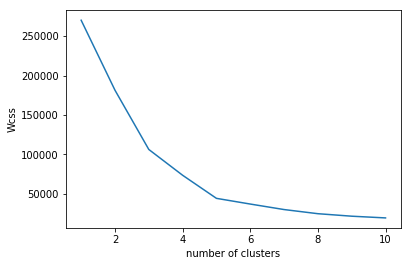

In [14]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel("Wcss")
plt.show()

In [16]:
### from the graph we can observe the slope od the line is at the point 5.so k = 5:

kmeans = KMeans(n_clusters = 5,init = "k-means++",random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [17]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

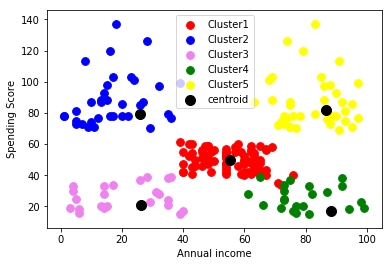

In [18]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 60,c = "red",label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,1],X[y_kmeans == 1,0],s = 60,c = "blue",label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,1],X[y_kmeans == 2,0],s = 60,c = "violet",label = 'Cluster3')
plt.scatter(X[y_kmeans == 3,1],X[y_kmeans == 3,0],s = 60,c = "green",label = 'Cluster4')
plt.scatter(X[y_kmeans == 4,1],X[y_kmeans == 4,0],s = 60,c = "yellow",label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = "black",label = "centroid")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend(loc = "best")
plt.show()
